<a href="https://colab.research.google.com/github/daniel0406070/Data-SCI-basic/blob/master/Mendel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

# 랜덤 넘버 제너레이터 시작~~
#np.random.seed(3)


In [ ]:
flowers = Table().with_columns(
'Color', make_array('Purple', 'White'),
'Model Proportion', make_array(0.75, 0.25),
'Plants', make_array(705, 224)
)
flowers

Color,Model Proportion,Plants
Purple,0.75,705
White,0.25,224


In [ ]:
total_plants = flowers.column('Plants').sum()
total_plants

929

In [ ]:
observed_proportion = flowers.column('Plants').item(0)/total_plants
observed_proportion

0.7588805166846071

In [ ]:
observed_statistic = abs(observed_proportion - 0.75)
observed_statistic

0.0088805166846070982

In [ ]:
model_colors = make_array('Purple', 'Purple', 'Purple', 'White')
new_sample = np.random.choice(model_colors, total_plants)

In [ ]:
proportion_purple = np.count_nonzero(new_sample == 'Purple')/total_plants
abs(proportion_purple - 0.75)

0.017491926803014035

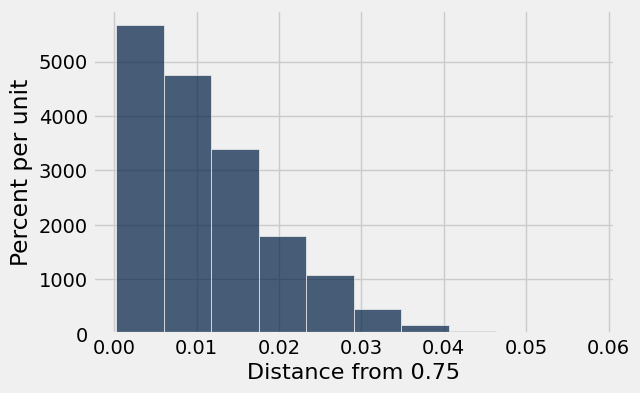

In [ ]:
repetitions = 5000
sampled_stats = make_array()
for i in np.arange(repetitions):
    new_sample = np.random.choice(model_colors, total_plants)
    proportion_purple = np.count_nonzero(new_sample == 'Purple')/total_plants
    sampled_stats = np.append(sampled_stats, abs(proportion_purple - 0.75))

results = Table().with_column('Distance from 0.75', sampled_stats)
results.hist()

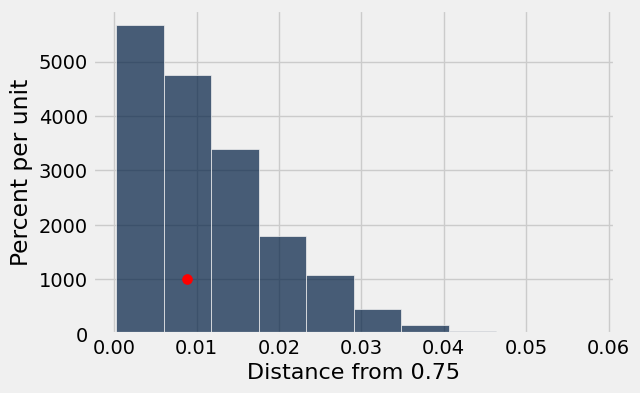

In [ ]:
results.hist()
#Plot the observed statistic as a large red point on the horizontal axis
plots.scatter(observed_statistic, 10, color='red', s=50);

the **observed significance level** or **P-value** for short.

The P-value is a chance computed using the probability distribution of the test statistic, and can be approximated by using the empirical distribution in Step 3.

Place the observed test statistic on the horizontal axis of the histogram, and find the proportion in the tail starting at that point. That's the P-value, or rather a pretty good approximation to the P-value based on the empirical distribution.

In [ ]:
sampled_stats

array([ 0.01533907,  0.02018299,  0.01803014, ...,  0.00780409,
        0.01157158,  0.00672766])

In [ ]:
empirical_P = np.count_nonzero(sampled_stats >= observed_statistic)/repetitions
empirical_P

0.545

The observed statistic of 0.00888 is pretty close to the median of all the values of the statistic generated under Mendel's model. You can think of that as a quantification of our earlier comment that the observed statistic is "right in the heart" of the distribution predicted by the null.

In [ ]:
np.count_nonzero(sampled_stats >= 0.035)/repetitions

0.0146

If a P-value is small, that means the tail beyond it is small,
and so the observed statistic is far away from what the null predicts. This implies that the data support the alternative hypothesis better than they support the null.

So if our observed statistic had been 0.035 instead of 0.00888, we would have chosen the
alternative hypothesis.

How small is "small"? There are conventions for this.


If the P-value is less than 5%, the result is called **"statistically significant."**

If the P-value is even smaller – less than 1% – the result is called **"highly statistically significant."**

In both cases, the test concludes that the data support the alternative hypothesis.

The method of statistical testing – choosing between hypotheses based on data in random samples – was developed by Sir Ronald Fisher in the early 20th century.

Sir Ronald might have set the convention for statistical significance somewhat unwittingly, in the following statement in his 1925 book Statistical Methods for Research Workers. About the 5% level, he wrote, "It is convenient to take